# **Lending Club Loans Analysis**

## **Context**
This dataset ([source](https://www.kaggle.com/itssuru/loan-data)) consists of data from almost 10,000 borrowers that took loans - with some paid back and others still in progress. It was extracted from lendingclub.com which is an organization that connects borrowers with investors. We've included a few suggested questions at the end of this template to help you get started.

## **Step by step of the analysis**

### 1. Business Understanding:
  - ¿How long it takes for users to pay back their loans?
  - ¿Which are the purposes that tend to be more profitable?
  - ¿Can we predict which loans will be fully paid?
  
### 2. Data Understanding:
  We will look for every column definition to understand how each variable will be helpful on our analysis.

### 3. Data Preparation:
  On the one hand, data doesn't have any NaN or missing value, so we will not have to worry about that issue. On the other hand, we will create dummy variables for the categorical columns for further analysis.

### 4. Analysis/Modeling: 
  Now we start with the EDA of the whole dataset to arrive in some conclusions.

### 5. Validation/Evaluation of Results: 
  With all the conclusions and insights from the last step, we now can answer our three questions.

### 6. Presentation/Visualization of Results:
  Finally, we will present all our findings on a blog post on [Medium](https://medium.com/) which link can be found at the end of this notebook.
  
---
### **Steps 2 through 5 will be done for each question presented in 1**

## **First, we import our tools**

We will use pandas and numpy for data preparation and add matplotlib and seaborn for the EDA and findings visualization. At the end we will also use scikit-learn to create three prediction models using linear regression, decision forrest and random forrest models of the library.

In [2]:
# Import every library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

## **Now we load the data**
We have two files which will be uploaded in this notebook:
 - loan_data: a file with 9578 records of loan data.
 - variable_explanation: a file with the description of every column of the loan_data file.

We will also change the dots on the column names for ease of use.

In [3]:
# Load both datasets
df = pd.read_csv('D:/My Personal Information/Udacity/Data Scientist Nanodegree/1. Data Science Process/Project - Write A Data Science Blog Post/loan_data.csv', index_col=None)
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

# Change the dots in the column names to underscores
df.columns = [c.replace(".", "_") for c in df.columns]
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## **Understanding the variables**
We will look into the shape, dtypes adn descriptions of the variables of our dataset.

In [4]:
# Understand the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 9578 rows and 14 columns.


In [5]:
# Check on the dataset details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
# Understand the variables
for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
# Join with the variables dataframe
var_dict = pd.read_csv('D:/My Personal Information/Udacity/Data Scientist Nanodegree/1. Data Science Process/Project - Write A Data Science Blog Post/variable_explanation.csv', index_col=0)
variables.set_index('Variable').join(var_dict)

D:\anaconda\envs\Data Science\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,Number of unique values,Values,Explanation
Variable,,,
credit_policy,2,"[1, 0]",1 if the customer meets the credit underwritin...
purpose,7,"[debt_consolidation, credit_card, all_other, h...",The purpose of the loan.
int_rate,249,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078...",The interest rate of the loan (more risky borr...
installment,4788,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13...",The monthly installments owed by the borrower ...
log_annual_inc,1987,"[11.35040654, 11.08214255, 10.37349118, 11.299...",The natural log of the self-reported annual in...
dti,2529,"[19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ...",The debt-to-income ratio of the borrower (amou...
fico,44,"[737, 707, 682, 712, 667, 727, 722, 677, 662, ...",The FICO credit score of the borrower.
days_with_cr_line,2687,"[5639.958333, 2760.0, 4710.0, 2699.958333, 406...",The number of days the borrower has had a cred...
revol_bal,7869,"[28854, 33623, 3511, 33667, 4740, 50807, 3839,...",The borrower's revolving balance (amount unpai...


## **Checking on some statistics**
We will check on descriptive statistics of the continuos variables and check on a correlation matrix using a heatmap.

In [7]:
# Descriptive statistics of all continuos variables
df.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


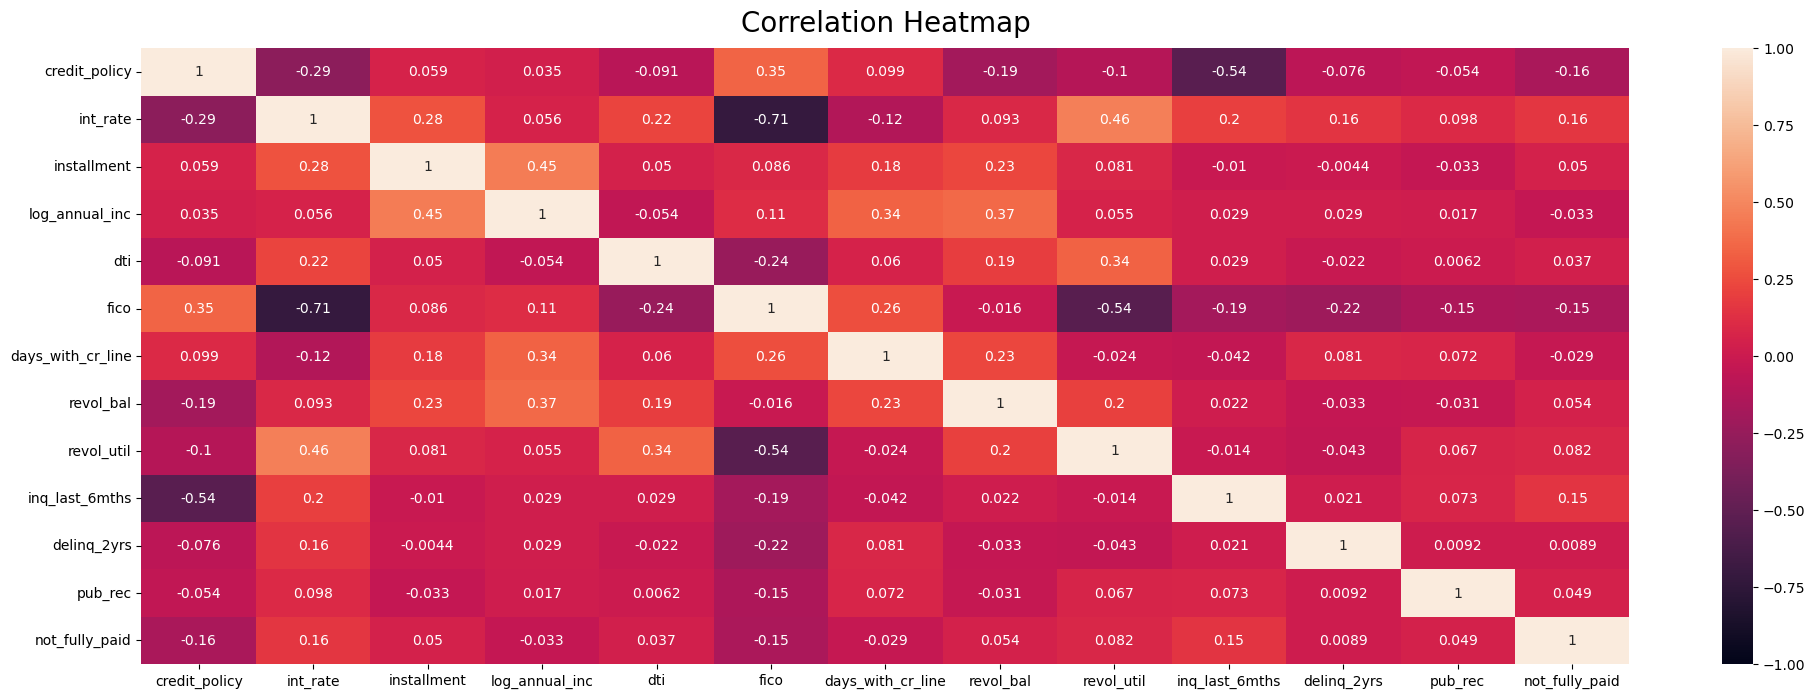

In [8]:
# Correlation Heatmap of all the dataset variables
plt.figure(figsize=(24, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)
plt.show()

## **Exploratory Data Analysis**

### Q1: ¿How long it takes for users to pay back their loans?
To approach this question we first look which variable we can use to answer it on our dataset. We know that de debt-to-income ratio (dti) is the percentage that the debt represents against the annual income.

$$ \large dti = \frac {Debt Amount}{Annual Income} $$

Considering that, we can find out how many months of the year each loan will be completely paid by doing the following calculation.

$$ \large months = (\frac {dti}{100}) * 12 $$

In [9]:
# Create the DataFrame to use on this analysis
q1 = pd.DataFrame((df['dti']/100)*12)

# Get descriptive statistics of the data
q1.describe()

,dti
count,9578.000000
mean,1.512801
std,0.826076
min,0.000000
25%,0.865500
50%,1.519800
75%,2.154000
max,3.595200


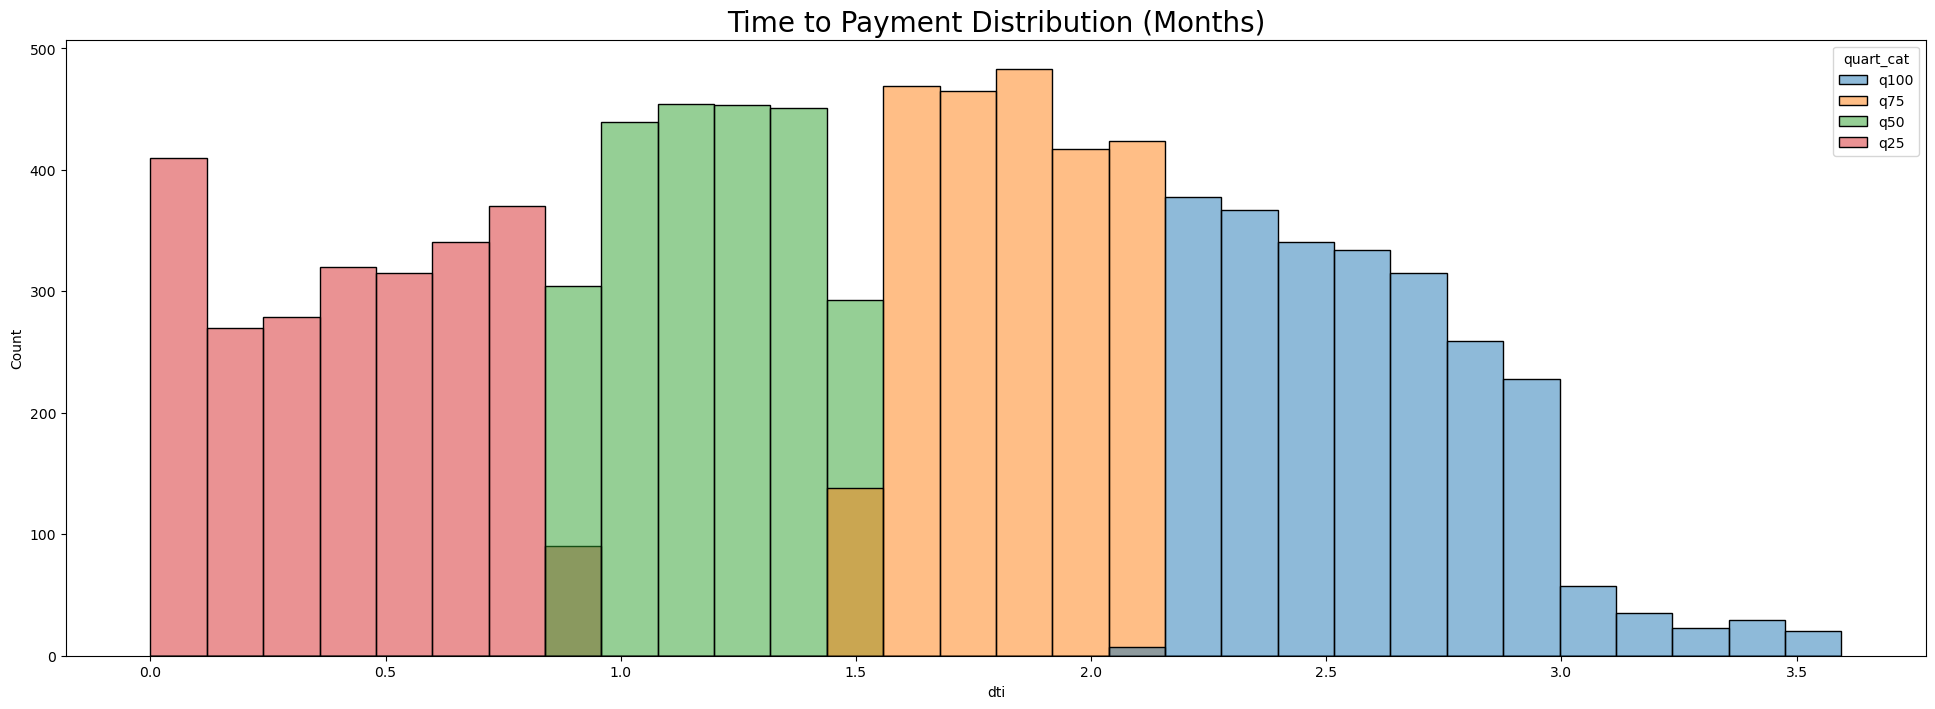

In [10]:
# Create categories based on the quartiles
conditions = [(q1['dti'] <= 0.865500),
              (q1['dti'] > 0.865500) & (q1['dti'] <= 1.519800),
              (q1['dti'] > 1.519800) & (q1['dti'] <= 2.154000),
              (q1['dti'] > 2.154000)]
values = ['q25','q50','q75','q100']

q1['quart_cat'] = np.select(conditions,values)

# Plot histogram of loans to be paid in said month
plt.figure(figsize=(24, 8))
sns.histplot(data=q1,x='dti',hue='quart_cat')
plt.title('Time to Payment Distribution (Months)',fontsize=20)
plt.show()

### Conclusion Q1:
Looking at the distribution of the months, most of them will be paid on about 1 and a half months while the rest is distributed on around 2 and 3 months. There is a small amount of loans that are meant to be paid on 3 to 3 and half months, but this is a small percentage of them.

This gives us a message that **the loans on LendingClub are paid quickly**, on less than 2 months most of the time. We will need to check now which kind of loan is the most profitable.

### Q2: ¿Which are the purposes that tend to be more profitable?
We will take on consideration three variables on our analysis: purpose, installments and months. Our logic is that the purpose that tends to be more profitable is the one that follows the next calculation:

$$ \large profit = months * installment $$

This is a very straight forward approach to keep it simple and to have continuity in our analysis. For this we will first look at the total count and mean installment per purpose.

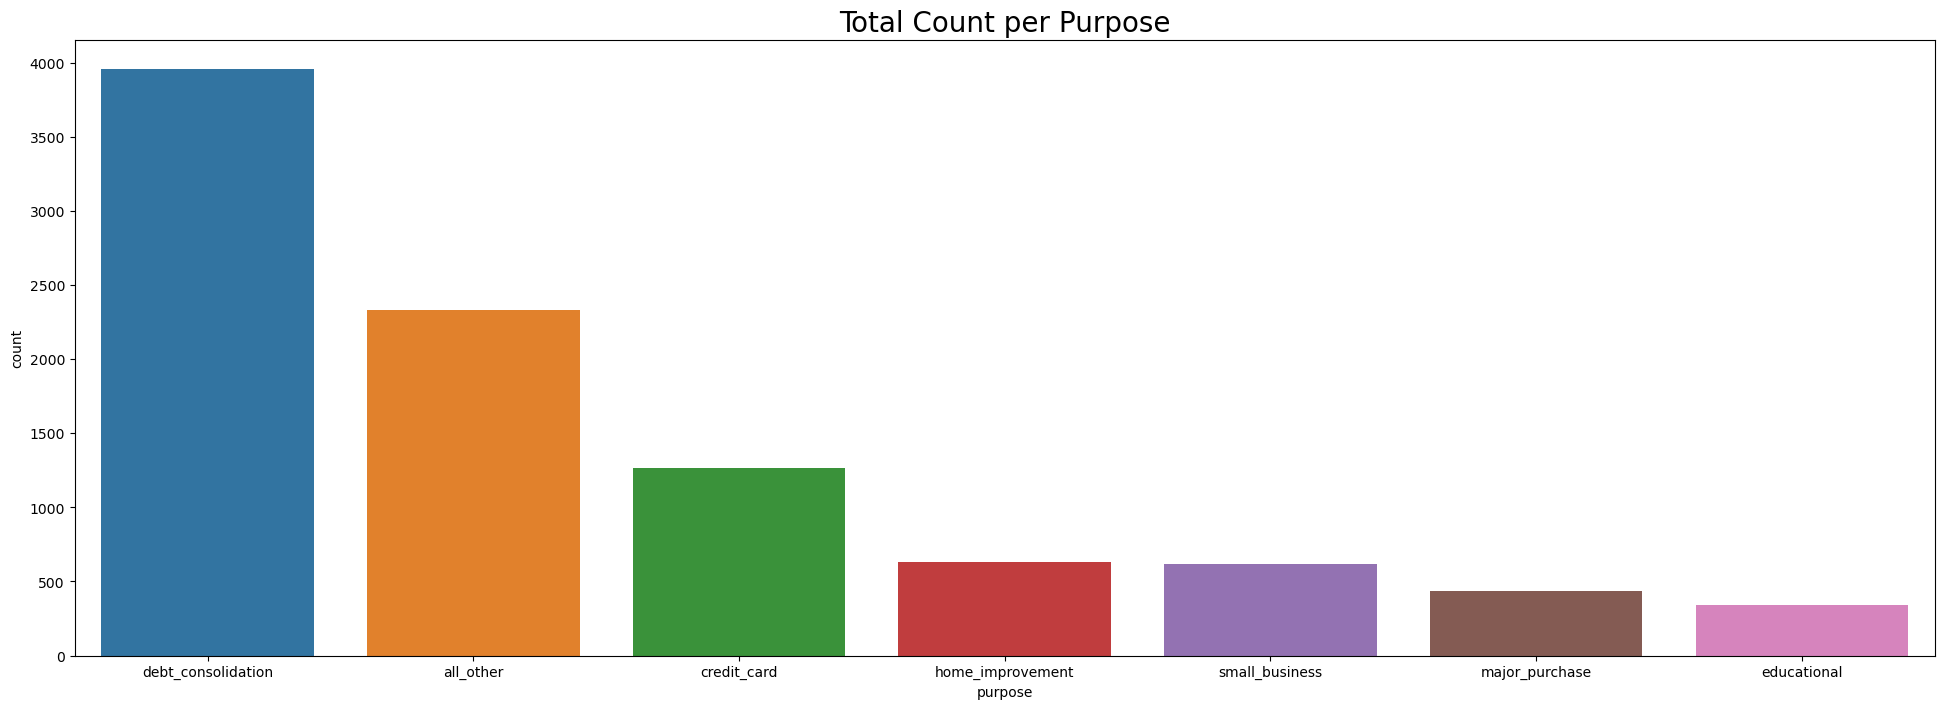

In [21]:
# Define the plotting function
def plotting(data,x,y='none',plot_type='countplot',title='',figsize=(12,8)):
    """
    INPUT:
    data - pandas dataframe
    x - pandas dataframe column that will be in the x axis.
    y - pandas dataframe column that will be in the y axis.
    plot_type - string with the type of plot needed. accepted values: countplot and barplot.
    title - string of the title of the plot
    figsize - tuple with the measures of the plot

    OUTPUT:
    plot - a new countplot or barplot depending on the user necessities
    """
    if plot_type == 'countplot':
        plt.figure(figsize=figsize)
        plot = sns.countplot(data=data,x=x,order=data[x].value_counts().index)
        plt.title(title,fontsize=20)
        plt.show()
    elif plot_type == 'barplot':
        plt.figure(figsize=figsize)
        sns.barplot(data=data,x=x,y=y)
        plt.title(title,fontsize=20)
        plt.show()

# Create the DataFrame to use on this analysis
q2 = pd.DataFrame(df[['purpose','installment','dti']])

# Plot total count per purpose
plotting(q2,'purpose',title='Total Count per Purpose',figsize=(24,8))

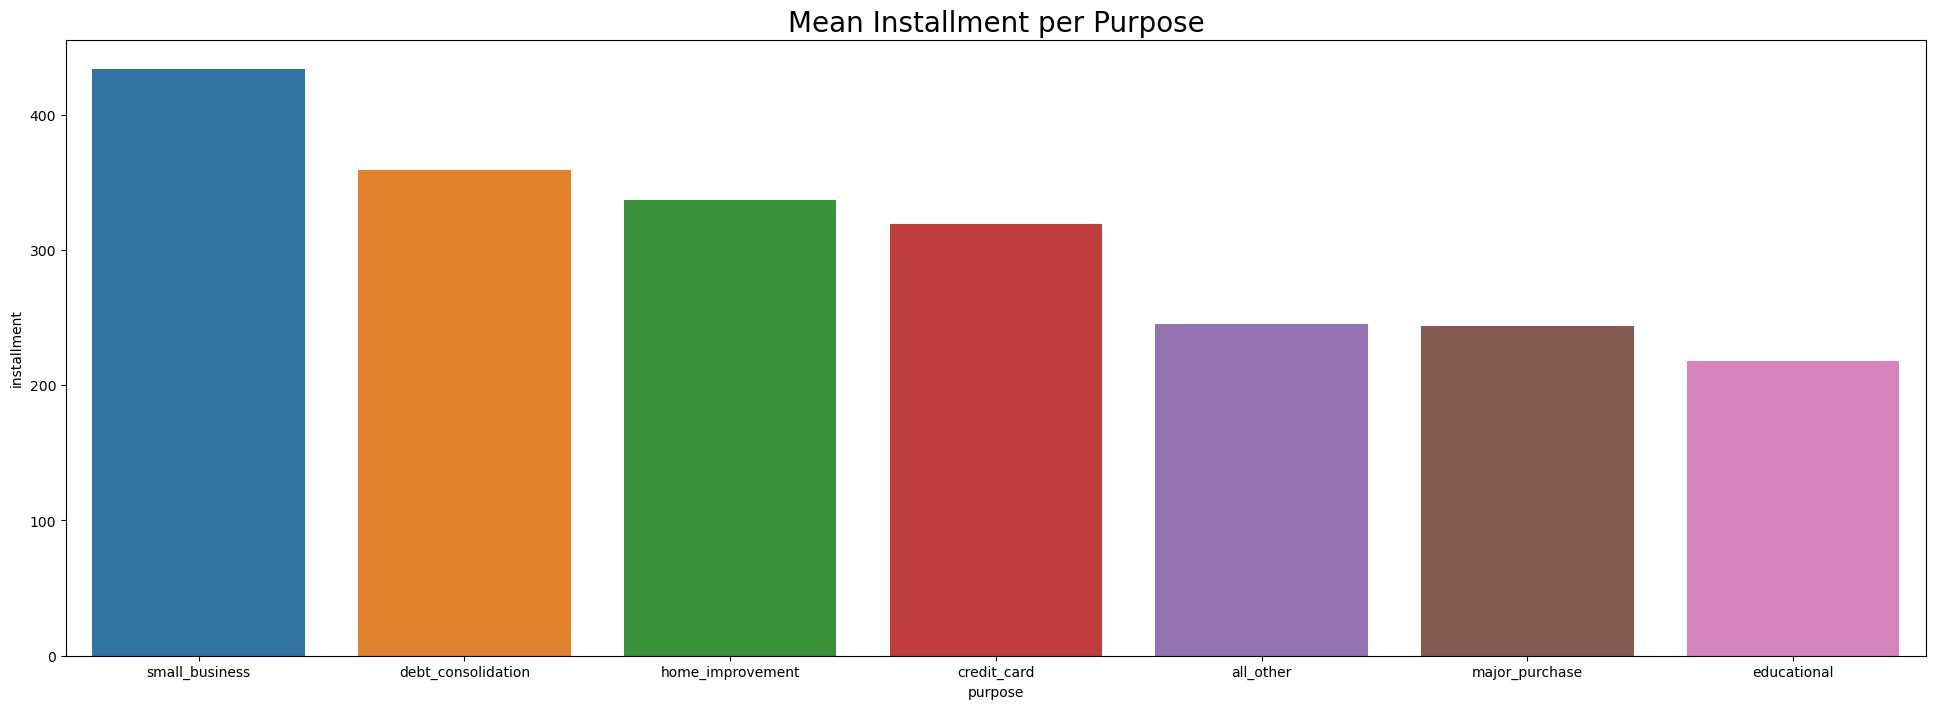

In [22]:
# Group by purpose and aggregate the installment
q2_g1 = q2.groupby('purpose').agg({'installment':'mean'}).sort_values(by=['installment'],ascending=False)
q2_g1.reset_index(level=0,inplace=True)

# Plot the profit per Purpose
plotting(q2_g1,'purpose',y='installment',plot_type='barplot',title='Mean Installment per Purpose',figsize=(24,8))

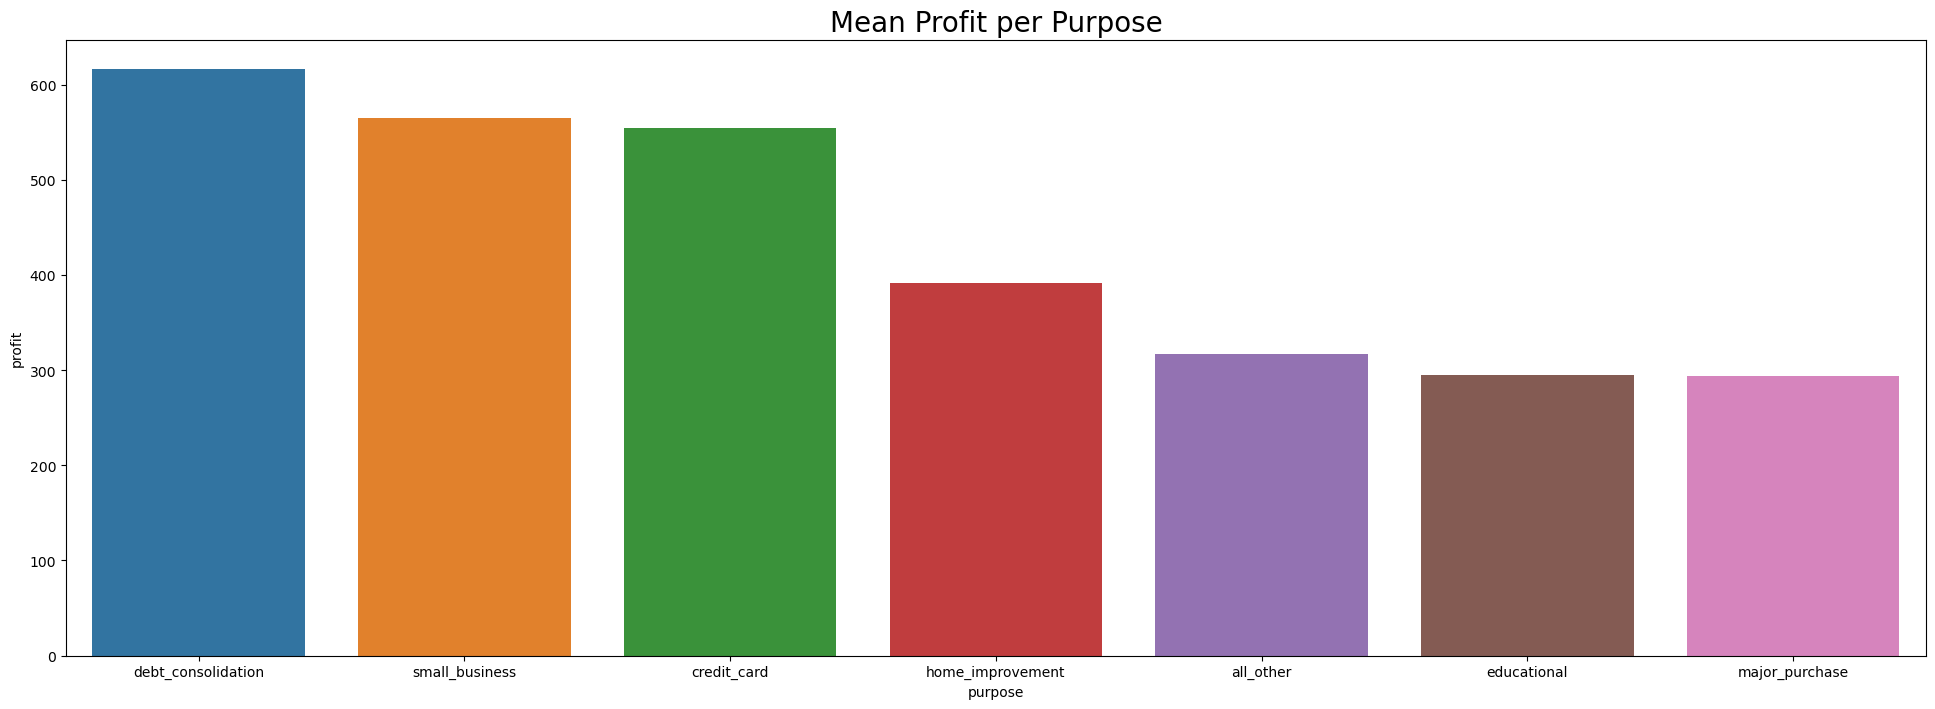

In [23]:
# Calculate the months column on the DataFrame
q2['months'] = (q2['dti']/100)*12

# Calculate the profit column in the DataFrame
q2['profit'] = q2['installment']*q2['months']

# Group by purpose and aggregate the profit
q2_g2 = q2.groupby('purpose').agg({'profit':'mean'}).sort_values(by=['profit'],ascending=False)
q2_g2.reset_index(level=0,inplace=True)

# Plot the profit per Purpose
plotting(q2_g2,'purpose',y='profit',plot_type='barplot',title='Mean Profit per Purpose',figsize=(24,8))

### Conclusion Q2:
Looking at the results on each purpose we now know that **the 3 main purposes which tend to be more profitable are Debt Consolidation, Small Business and Credit Card**. But, we also need to check the mean installment per purpose which shows that **the Small Business loans installments are the biggest**. 

**If we could give more loans on that category, considering that it has one of the lowest total counts, we can increase the profit made considerably**.

### Q3: ¿Can we predict which loans will be fully paid?
After knowing how much time it takes the average user to fully pay a loan and the most profitable loan purpose, we now will focus on checking which loans will for sure be paid. For that we will choose which model predicts the best the not_fully_paid variable on the dataset, but first, we will have to create the dummy variables of our categorical variable purpose and then split the data into training and test sets.

Then we will do the two models: DecisionTree and RandomForrest.

In [14]:
# Create the DataFrame with the dummy variables
q3 = pd.get_dummies(df, columns=['purpose'],prefix='purpose',prefix_sep='_',drop_first=True)

# Separate the data into train and test sets
X = q3.drop('not_fully_paid',axis=1)
y = q3['not_fully_paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

#### DecisionTree:

In [15]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_test_preds_1 = dt.predict(X_test)

print("Classification Report\n\n",
      classification_report(y_test,y_test_preds_1),
      "\n Confusion Matrix\n\n",
      confusion_matrix(y_test,y_test_preds_1))

Classification Report

               precision    recall  f1-score   support

           0       0.84      0.84      0.84      2408
           1       0.19      0.20      0.20       466

    accuracy                           0.74      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.74      0.74      2874
 
 Confusion Matrix

 [[2024  384]
 [ 373   93]]


#### RandomForrest:

In [16]:
rf = RandomForestClassifier(n_estimators=500,min_samples_leaf=1, min_samples_split=5)
rf.fit(X_train,y_train)
y_test_preds_2 = rf.predict(X_test)

print("Classification Report\n\n",
      classification_report(y_test,y_test_preds_2),
      "\n Confusion Matrix\n\n",
      confusion_matrix(y_test,y_test_preds_2))

Classification Report

               precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.38      0.02      0.03       466

    accuracy                           0.84      2874
   macro avg       0.61      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874
 
 Confusion Matrix

 [[2395   13]
 [ 458    8]]


### Conclusion Q3:
After running both models we know now that **the RandomForrest is the best model for this case** due to the better metrics on the Classification Report. A next step on this analysis would be to further analyze which features are the best to improve this model metrics.

## **Summary of findings**:
- The time for a loan to be paid is small having the longest time to be 3 and a half months and most of them to be paid in around 1 or 2 months.
- The most profitable purposes are Debt Consolidation, Small Businesses and Credit Cards. Working on giving more loans related to Small Businesses could represent a bigger profit in the future.
- The best model that fit the data to predict if a loan will be paid is the Random Forrest, but improving on this is a necessity in order to get better metric results.

**Overall, with a model to accurately predict the loan payment of a given purpose we could automate and give more loans to the top three more profitable purposes and earn more. This would push a lot the Small Businesses which could be a lever of growth in the future.**